# MNIST Digits - Classification Using SVM

In this notebook, we'll explore the popular MNIST dataset and build an SVM model to classify handwritten digits. <a href='http://yann.lecun.com/exdb/mnist/'>Here is a detailed description of the dataset.</a>

We'll divide the analysis into the following parts:
- Data understanding and cleaning
- Data preparation for model building
- Building an SVM model - hyperparameter tuning, model evaluation etc.


# Data Understanding and Cleaning
Let's understand the dataset and see if it needs some cleaning etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc

In [2]:
#load the dataset
digits = pd.read_csv("train.csv")

In [3]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
digits.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
digits.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [7]:
digits.shape

(42000, 785)

In [8]:
one = digits.iloc[0, 1:]
one.shape

(784,)

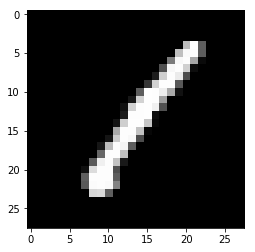

In [9]:
one = one.values.reshape(28, 28)
plt.imshow(one, cmap='gray')

#### Side note: Indexing Recall ####
`list =    [0, 4, 2, 10, 22, 101, 10]` <br>
`indices = [0, 1, 2, 3, ...,        ]` <br>
`reverse = [-n           -3  -2   -1]` <br>

In [10]:
# visualise the array
print(one[5:-5, 5:-5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250 253  93]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 123 248 253 167  10]
 [  0   0   0   0   0   0   0   0   0   0   0   0  80 247 253 208  13   0]
 [  0   0   0   0   0   0   0   0   0   0   0  29 207 253 235  77   0   0]
 [  0   0   0   0   0   0   0   0   0   0  54 209 253 253  88   0   0   0]
 [  0   0   0   0   0   0   0   0   0  93 254 253 238 170  17   0   0   0]
 [  0   0   0   0   0   0   0   0  23 210 254 253 159   0   0   0   0   0]
 [  0   0   0   0   0   0   0  16 209 253 254 240  81   0   0   0   0   0]
 [  0   0   0   0   0   0   0  27 253 253 254  13   0   0   0   0   0   0]
 [  0   0   0   0   0   0  20 206 254 254 198   7   0   0   0   0   0   0]
 [  0   0   0   0   0   0 168 253 253 196   7   0   0   0   0   0   0   0]
 [  0   0   0   0   0  20 203 253 248  76   0   0   0   0   0   0   0   0]
 [  0   0   0   0  22 188 253 245  93   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 103 253

In [11]:
# Summarise count in terms of percentage 
100*(round(digits.label.astype('category').value_counts()/len(digits.index), 4))

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

Thus, each digit/label has an approximately 9%-11% fraction in the dataset and the dataset is balanced. This is an important factor in considering the choices of models to be used, especially SVM, since SVMs rarely perform well on imbalanced data (think about why that might be the case).

Data Preparation for Model Building
Let's now prepare the dataset for building the model. We'll only use a fraction of the data else training will take a long time

In [12]:
# Creating training and test sets
# Splitting the data into train and test
X = digits.iloc[:, 1:]
Y = digits.iloc[:, 0]

# Rescaling the features
from sklearn.preprocessing import scale
X = scale(X)

# train test split with train_size=10% and test size=90%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


(29400, 784)
(12600, 784)
(29400,)
(12600,)


## Model Building

Let's now build the model and tune the hyperparameters. Let's start with a **linear model** first.

### Linear SVM

Let's first try building a linear SVM model (i.e. a linear kernel). 

In [13]:
from sklearn import svm
from sklearn import metrics

# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')

# fit
svm_linear.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [14]:
# predict
predictions = svm_linear.predict(x_test)
predictions[:10]

array([1, 3, 0, 0, 1, 9, 1, 5, 0, 6], dtype=int64)

In [15]:
# evaluation: accuracy
# C(i, j) represents the number of points known to be in class i 
# but predicted to be in class j
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion

array([[1180,    0,    3,    3,    2,    9,   10,    1,    5,    0],
       [   0, 1397,    9,    3,    2,    1,    1,    2,    6,    1],
       [  12,   23, 1138,   26,   12,    6,   10,   11,   18,    2],
       [   7,    8,   47, 1141,    5,   42,    1,    6,   18,    9],
       [   6,    3,    6,    1, 1146,    3,    5,    3,    2,   34],
       [  14,    3,   14,   73,   14,  955,   10,    3,   27,    8],
       [   9,    3,   18,    0,    7,   18, 1182,    0,    5,    0],
       [   2,    5,   12,   10,   25,    1,    0, 1223,    0,   37],
       [  14,   14,   27,   45,    7,   40,    7,    7, 1055,   11],
       [   7,    6,    7,   12,   62,    5,    1,   55,   15, 1139]],
      dtype=int64)

In [16]:
# measure accuracy
metrics.accuracy_score(y_true=y_test, y_pred=predictions)

0.9171428571428571

In [17]:
# class-wise accuracy
class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1213
           1       0.96      0.98      0.97      1422
           2       0.89      0.90      0.90      1258
           3       0.87      0.89      0.88      1284
           4       0.89      0.95      0.92      1209
           5       0.88      0.85      0.87      1121
           6       0.96      0.95      0.96      1242
           7       0.93      0.93      0.93      1315
           8       0.92      0.86      0.89      1227
           9       0.92      0.87      0.89      1309

   micro avg       0.92      0.92      0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



In [18]:
# run gc.collect() (garbage collect) to free up memory
# else, since the dataset is large and SVM is computationally heavy,
# it'll throw a memory error while training
gc.collect()

182

### Non-Linear SVM

Let's now try a non-linear model with the RBF kernel.

In [19]:
# rbf kernel with other hyperparameters kept to default 
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(x_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [20]:
# predict
predictions = svm_rbf.predict(x_test)

# accuracy 
print(metrics.accuracy_score(y_true=y_test, y_pred=predictions))

0.9593650793650793


The accuracy achieved with a non-linear kernel is slightly higher than a linear one. Let's now do a grid search CV to tune the hyperparameters C and gamma.

### Grid Search Cross-Validation

In [21]:
# conduct (grid search) cross-validation to find the optimal values 
# of cost C and the choice of kernel

from sklearn.model_selection import GridSearchCV

parameters = {'C':[1, 10, 100], 
             'gamma': [1e-2, 1e-3, 1e-4]}

# instantiate a model 
svc_grid_search = svm.SVC(kernel="rbf")

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy')

# fit
clf.fit(x_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [22]:
# results
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\de

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,749.293332,3.139343,182.232224,0.949830,1,0.01,"{'C': 1, 'gamma': 0.01}",0.809772,0.803347,0.801776,0.804966,0.003459,9,0.999643,0.999898,0.999694,0.999745,0.000110
1,131.324561,1.051877,87.391614,0.422911,1,0.001,"{'C': 1, 'gamma': 0.001}",0.953590,0.948464,0.946514,0.949524,0.002984,3,0.975250,0.976838,0.975973,0.976020,0.000649
2,185.413732,0.605153,122.982482,0.202389,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.924623,0.919584,0.919159,0.921122,0.002482,6,0.928965,0.930769,0.930674,0.930136,0.000829
3,764.797840,1.169399,182.348799,0.389321,10,0.01,"{'C': 10, 'gamma': 0.01}",0.823745,0.816002,0.817801,0.819184,0.003309,7,1.000000,1.000000,1.000000,1.000000,0.000000
4,111.432941,0.914422,77.138623,0.563244,10,0.001,"{'C': 10, 'gamma': 0.001}",0.963178,0.957343,0.956824,0.959116,0.002881,1,0.998112,0.998776,0.998776,0.998554,0.000313
5,87.547782,0.526225,74.106335,0.046777,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.944104,0.940198,0.936613,0.940306,0.003059,5,0.958257,0.961380,0.963067,0.960901,0.001993
6,764.364552,1.726344,182.413798,0.127806,100,0.01,"{'C': 100, 'gamma': 0.01}",0.823745,0.816002,0.817801,0.819184,0.003309,7,1.000000,1.000000,1.000000,1.000000,0.000000
7,110.751495,0.820951,77.763088,0.642544,100,0.001,"{'C': 100, 'gamma': 0.001}",0.962566,0.955506,0.956824,0.958299,0.003066,2,1.000000,1.000000,1.000000,1.000000,0.000000
8,65.357530,0.676607,58.621228,0.297859,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.947980,0.945709,0.941513,0.945068,0.002679,4,0.988314,0.988980,0.988012,0.988435,0.000404


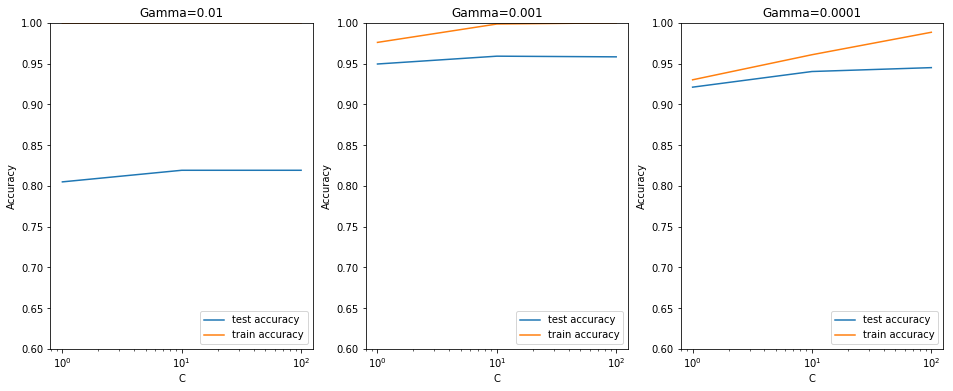

In [23]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

From the plot above, we can observe that (from higher to lower gamma / left to right):
- At very high gamma (0.01), the model is achieving 100% accuracy on the training data, though the test score is quite low (<75%). Thus, the model is overfitting.

- At gamma=0.001, the training and test scores are comparable at around C=1, though the model starts to overfit at higher values of C

- At gamma=0.0001, the model does not overfit till C=10 but starts showing signs at C=100. Also, the training and test scores are slightly lower than at gamma=0.001.

Thus, it seems that the best combination is gamma=0.001 and C=1 (the plot in the middle), which gives the highest test accuracy (~92%) while avoiding overfitting.

Let's now build the final model and see the performance on test data.

### Final Model

Let's now build the final model with chosen hyperparameters.

In [24]:
# optimal hyperparameters
best_C = 1
best_gamma = 0.001

# model
svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)

# fit
svm_final.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
# predict
predictions = svm_final.predict(x_test)

In [26]:
# evaluation: CM 
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)

# measure accuracy
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)

print(test_accuracy, "\n")
print(confusion)

0.9574603174603175 

[[1193    0    3    0    2    2    5    2    5    1]
 [   0 1394    8    4    4    1    1    5    4    1]
 [   4    4 1208    6    9    1    4   12    7    3]
 [   2    4   19 1208    4   14    0   13   11    9]
 [   3    1    8    0 1170    2    2    5    3   15]
 [   3    2    2   21    6 1059   13    8    5    2]
 [   7    2    7    1    5   11 1201    6    2    0]
 [   1    2    9    6   13    2    0 1264    1   17]
 [   2    5    8    8    9   11    7    8 1163    6]
 [   4    6    3   13   29    2    0   39    9 1204]]


### Conclusion

The final accuracy on test data is approx. 95.74%.